## Classification of Parkinson patients using an extra feature of Tapping: Std of the interval.

In [1]:
import synapseclient
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt

In [2]:
def TapPerformance(TapPD1):
    TapPD1.loc[TapPD1.TappedButtonId == 'TappedButtonLeft', 'TappedButtonId'] = 0
    TapPD1.loc[TapPD1.TappedButtonId == 'TappedButtonRight', 'TappedButtonId'] = 1
    TapPD1.loc[TapPD1.TappedButtonId == 'TappedButtonNone', 'TappedButtonId'] = 2
    #TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonLeft'] = 0
    #TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonRight'] = 1
    #TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonNone'] = 2
    TapPD1 = Artifactfixed(TapPD1)
    TapPerf= TapPD1.shape[0]
    #Temp=TapPD1.TapTimeStamp.to_numpy()
    #Int=Temp[2:-1]-Temp[1:-2]
    #TapStd=Int.std()
    return ([TapPerf])

In [3]:
#Index=list()
def Artifactfixed(TapCont):
    Ind =  [True] * TapCont.shape[0] #Make a column of Trues
    for item in range(0,TapCont.shape[0]-1):
        if TapCont.TapCoordinate[item]==TapCont.TapCoordinate[item+1]:
            if TapCont.TappedButtonId[item]==2:
                Ind[item]=False
            elif TapCont.TappedButtonId[item+1]==2:
                Ind[item]=False
    TapContArtFixed=TapCont[Ind]
    
    return TapContArtFixed
          

In [4]:

syn = synapseclient.Synapse()
syn.login('catarivera8', 'Crm1061709701')


## QUERY THE mPower PROJECT (syn4993293) FOR ALL OF THE TABLES
# See examples: https://python-docs.synapse.org/build/html/index.html 
# and https://www.synapse.org/#!Synapse:syn4993293/discussion/threadId=6785
with open('TappingTable.csv') as csvfile:
    TapTable=pd.read_csv(csvfile, delimiter=',')
with open('DemoTable.csv') as csvfile:
    DemoTable=pd.read_csv(csvfile, delimiter=',') 
with open('MemoryTable.csv') as csvfile:
    MemTable=pd.read_csv(csvfile, delimiter=',')
#Using Patient column (healthCode) as index for the Data frames
#TapTableB = TapTable.set_index("healthCode", drop = False) 
#DemoTableB = DemoTable.set_index("healthCode", drop = False)    

      
#TapPD = list()
PathList = list()
LabelList = list()
#PatientType = list()
#PatientList = list()
#AgeList = list()
Perform =list()
TapStd = list ()
for offset in range(0,70000,100):
    results = syn.tableQuery('SELECT * FROM syn5511439 LIMIT 100 OFFSET '+str(offset))
    file_map=syn.downloadTableColumns(results,['tapping_results.json.TappingSamples'])
    for file_handle_id, path in file_map.items():
        #TapPD.append(pd.read_json(path))
        PathList.append(path)
        LabelList.append(int(file_handle_id))
        #PatientType.append(TapTableB['medTimepoint'][TapTable['tapping_results.json.TappingSamples'] == int(file_handle_id)])
        Perform.append(TapPerformance(pd.read_json(path))[0]) #Tap performance
        #TapStd.append(TapPerformance(pd.read_json(path))[1]) #Tap performance
        #PatientList.append(TapTableB['healthCode'][TapTableB['tapping_results.json.TappingSamples'] == int(file_handle_id)])
        #DemoTableB.loc[(TapTableB['healthCode'][TapTableB['tapping_results.json.TappingSamples'] == int(file_handle_id)]),"age"]
        

Welcome, Catalina Rivera!



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



[WARNING] /Users/catalina/anaconda/envs/insight/lib/python3.8/site-packages/synapseclient/client.py:3481: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



In [5]:

MemTable.head()

,ROW_ID,ROW_VERSION,recordId,healthCode,createdOn,appVersion,phoneInfo,MemoryGameResults.json.MemoryGameOverallScore,MemoryGameResults.json.MemoryGameNumberOfGames,MemoryGameResults.json.MemoryGameNumberOfFailures,MemoryGameResults.json.startDate,MemoryGameResults.json.endDate,MemoryGameResults.json.MemoryGameGameRecords,medTimepoint
0,8890,3,5a0b4204-8a6c-430f-be93-c5aa2d6c9e33,46f5740b-afa0-4432-94a4-4155ae963b75,1.429650e+12,"version 1.0.5, build 12",iPhone 6 Plus,400,5,0,1.429650e+12,1.429650e+12,5754330.0,I don't take Parkinson medications
1,8891,3,4cfc9a04-9956-410c-a2e8-592b565aa305,64aedea6-b1f9-49da-8b10-3f02d8ed04b6,1.429650e+12,"version 1.0.5, build 12",iPhone 6,260,5,1,1.429650e+12,1.429650e+12,5743634.0,I don't take Parkinson medications
2,8892,3,1775e1ac-2842-47b6-9060-5407cf3a7352,a7e09a7f-d74b-4c06-8e5f-f011eabbcadb,1.429650e+12,"version 1.0.5, build 12",iPhone 6 Plus,285,5,1,1.429650e+12,1.429650e+12,5723609.0,I don't take Parkinson medications
3,8893,3,4a6213f1-3fec-45a4-b168-006eb2c6e1fe,c959f434-9f57-4730-b4c1-804789db0a33,1.429660e+12,"version 1.0.5, build 12",iPhone 6,255,5,2,1.429660e+12,1.429660e+12,5584921.0,Immediately before Parkinson medication
4,8894,3,e2e51aff-03e0-4a8f-81bd-b3f2bbee176a,459e2be9-61d0-4c11-b707-01afe7e34fc6,1.429660e+12,"version 1.0.5, build 12",iPhone 6 Plus,165,5,2,1.429660e+12,1.429660e+12,5667693.0,I don't take Parkinson medications


## Building data frame using tapping performance and demographic information

In [6]:
TapTable.columns
#Drop columns no needed
TapTable=TapTable.drop(['ROW_ID', 'ROW_VERSION','recordId','createdOn','appVersion','phoneInfo','accel_tapping.json.items','tapping_results.json.ButtonRectLeft','tapping_results.json.ButtonRectRight','tapping_results.json.endDate','tapping_results.json.startDate','tapping_results.json.TappingViewSize','medTimepoint'], axis=1)
#Creating directory
d = {'tapping_results.json.TappingSamples':LabelList,'TapPerform':Perform}
PerfInfo = pd.DataFrame(d)
#Merges TapTables with the PerfInfo and drops thos values in TapTable that are not defined in PerInfo
#TapTable=TapTable.merge(PerfInfo,left_on='tapping_results.json.TappingSamples', right_on='tapping_results.json.TappingSamples')
TapTable=TapTable.merge(PerfInfo)
TapTableN = TapTable.groupby("healthCode")["TapPerform"].mean()
TapTableN = pd.DataFrame(TapTableN)  
TapTableN = TapTableN.reset_index()
TapTableN.shape
#TapTemp2 = TapTable.groupby("healthCode")["TapPerform"].std()
#print(TapTemp2.shape)
#TapTableN=pd.concat([TapTemp,TapTemp2], axis=1)
#print(TapTableN.shape)


(7755, 2)

In [7]:
TapTableN.head()

,healthCode,TapPerform
0,000240d1-1110-4dd2-a2d0-e344c37efd68,325.0
1,0002d5ff-53da-44bb-ab0d-f2426a8c78e2,104.0
2,0005a31d-e52c-447c-9971-ccc7bef667fb,308.0
3,00081bd9-9abd-4003-b035-de6cc3e8c922,43.5
4,00290381-e82e-46b2-b4e6-df115823d71b,222.5


In [8]:
MemTable.columns
MemTable=MemTable.drop(['ROW_ID', 'ROW_VERSION','recordId','createdOn','appVersion','phoneInfo','MemoryGameResults.json.startDate','MemoryGameResults.json.endDate','MemoryGameResults.json.MemoryGameGameRecords','medTimepoint'], axis=1)
MemTableN = MemTable.groupby("healthCode")["MemoryGameResults.json.MemoryGameOverallScore"].mean()
MemTableN = pd.DataFrame(MemTableN)  
MemTableN = MemTableN.reset_index()
print(MemTableN.head())


                             healthCode  \
0  00081bd9-9abd-4003-b035-de6cc3e8c922   
1  0085b356-0550-4cf1-85bd-2bcd89bf1201   
2  010aed99-c9b3-4bdc-a23b-530d619b43a9   
3  01185d64-7791-4282-8c3d-e657cd810bb0   
4  0142010e-cb15-4391-90b5-29ac0dbe5bae   

   MemoryGameResults.json.MemoryGameOverallScore  
0                                          210.0  
1                                          240.0  
2                                          255.0  
3                                          215.0  
4                                          257.5  


In [9]:
print(MemTableN.shape)

(968, 2)


In [10]:

#Sub-DataFrame of Demo Table with only features of interest: Age, diagnostic year, gender.
#DemoTable.head()
DemoTableN=DemoTable[["age","healthCode","diagnosis-year","gender"]]
DemoTableN.shape
#Merges TapTables with the PerfInfo and drops thos values in TapTable that are not defined in PerInfo
TapTableN=TapTableN.merge(DemoTableN)
TapTableN.shape
#TapMemTableN=pd.concat([TapTableN, MemTableN], axis=1)
#TapMemTableN
#TapMemTableN.head()
#TapTable.head()
#PatientTemp = TapTable.groupby("healthCode")["healthCode"].count()
#print(PatientTemp)
#TapMemTableN=TapMemTableN.merge(DemoTableN)
#TapMemTableN.head()


(6340, 5)

In [11]:
TapMemTableN=TapTableN.merge(MemTableN)
print(TapMemTableN)

                               healthCode  TapPerform   age  diagnosis-year  \
0    00081bd9-9abd-4003-b035-de6cc3e8c922   43.500000  70.0             NaN   
1    0085b356-0550-4cf1-85bd-2bcd89bf1201  119.333333  60.0          2009.0   
2    010aed99-c9b3-4bdc-a23b-530d619b43a9  202.500000  46.0             NaN   
3    0142010e-cb15-4391-90b5-29ac0dbe5bae  201.000000  37.0             NaN   
4    0160664a-f4af-4071-a4aa-2967f3ea0503  184.975207  64.0          2012.0   
..                                    ...         ...   ...             ...   
759  ff5abff8-7ece-4735-b568-4f4d361f1841  351.625000  36.0             NaN   
760  ff699dbc-26d4-4dae-8c34-d0fb7b96ae21  143.800000  41.0             NaN   
761  ff776fbd-45ad-491b-ba6d-67a74f62c434  164.000000  18.0             NaN   
762  ffab2631-dfe1-4f5e-bd9e-f763e8aede19  231.933333  56.0          2009.0   
763  ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3  148.285714  61.0          2010.0   

     gender  MemoryGameResults.json.MemoryGameOvera

In [12]:
TapMemTableN=TapMemTableN.dropna(subset=['age','gender','MemoryGameResults.json.MemoryGameOverallScore'])

In [13]:
# change gender column to categorical 0:female, 1: male
df_gender = pd.get_dummies(TapMemTableN['gender'],drop_first=True)
#print(TapTableN.gender.value_counts())
TapMemTableN = pd.concat([TapMemTableN, df_gender], axis=1)
TapMemTableN=TapMemTableN.drop(['healthCode','gender'], axis=1)



In [14]:
TapMemTableN.head()


,TapPerform,age,diagnosis-year,MemoryGameResults.json.MemoryGameOverallScore,Male
0,43.500000,70.0,NaN,210.000000,1
1,119.333333,60.0,2009.0,240.000000,1
2,202.500000,46.0,NaN,255.000000,1
3,201.000000,37.0,NaN,257.500000,1
4,184.975207,64.0,2012.0,256.428571,1


In [15]:
# diagnosis-year becomes years with diagnosed disease
TapMemTableN['diagnosis-year']=(2015-TapMemTableN['diagnosis-year'])
#NAN REPLACED WITH ZERO AND OTHER INT REPLACED WITH ONE
dfb = TapMemTableN['diagnosis-year'].notnull().astype(int)
TapMemTableN['YearsPD']=dfb
print(TapMemTableN)


     TapPerform   age  diagnosis-year  \
0     43.500000  70.0             NaN   
1    119.333333  60.0             6.0   
2    202.500000  46.0             NaN   
3    201.000000  37.0             NaN   
4    184.975207  64.0             3.0   
..          ...   ...             ...   
759  351.625000  36.0             NaN   
760  143.800000  41.0             NaN   
761  164.000000  18.0             NaN   
762  231.933333  56.0             6.0   
763  148.285714  61.0             5.0   

     MemoryGameResults.json.MemoryGameOverallScore  Male  YearsPD  
0                                       210.000000     1        0  
1                                       240.000000     1        1  
2                                       255.000000     1        0  
3                                       257.500000     1        0  
4                                       256.428571     1        1  
..                                             ...   ...      ...  
759                            

In [16]:
X=TapMemTableN[['TapPerform', 'age','Male','TapPerform','MemoryGameResults.json.MemoryGameOverallScore']]
y=TapMemTableN['YearsPD']
sum(y)

288

## Building the model

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
classifiers = [LogisticRegression(random_state=13), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=13),
               RandomForestClassifier(random_state=13)]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

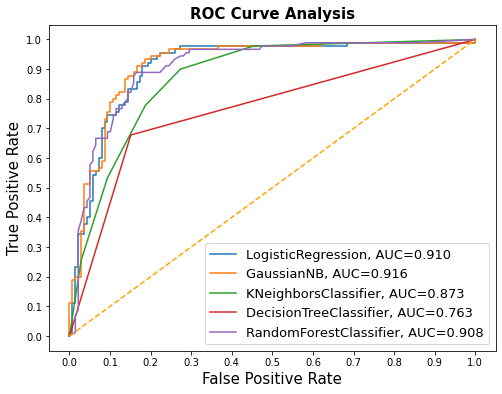

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [21]:
#Notes on the Report:
#Precision 0: TN/(TN+FN) of those predicted with out the disease, which how many really do not have it.
#Precision 1: TP/(TP+FP) of those predicted with the disease, which how many really had it.
#Recall 0: TN/(TN+FP) of those that dont have the disease how many were predicted with out the disease
#Recall 1: TP/(TP+FN) of those that have the disease how many were predicted with the disease
#Accuracy: TP+TN/(TP+TN+FP+FN), how many were classified correctly.
#For early diagnosis we would like to focus on recall 1 to be high. People with early stages of the disease should diagnose
#Few false negatives.

## Comparing to random performance of the classifiers
